In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes_csv.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

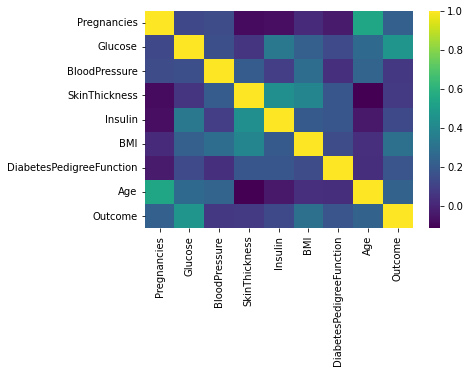

In [5]:
sns.heatmap(df.corr(), cmap='viridis')

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
X = df[df.columns[:-1]].values
Y = df['Outcome'].values

In [8]:
X[:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [9]:
Y[:5]

array([1, 0, 1, 0, 1])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [11]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

In [12]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train[:5]

array([[0.17647059, 0.81407035, 0.42622951, 0.38383838, 0.        ,
        0.55439642, 0.24508967, 0.05      ],
       [0.        , 0.67839196, 0.55737705, 0.42424242, 0.29550827,
        0.63040238, 0.12254483, 0.05      ],
       [0.29411765, 0.58291457, 0.60655738, 0.29292929, 0.        ,
        0.48137109, 0.24850555, 0.23333333],
       [0.17647059, 0.60301508, 0.57377049, 0.3030303 , 0.15957447,
        0.63934426, 0.15969257, 0.15      ],
       [0.05882353, 0.43718593, 0.63934426, 0.27272727, 0.03782506,
        0.51564829, 0.00982067, 0.01666667]])

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [15]:
model.fit(X_train, Y_train)

LinearRegression()

In [16]:
model.score(X_test, Y_test)

0.24897218434430102

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [18]:
model.fit(X_train, Y_train)

LogisticRegression()

In [19]:
model.score(X_test, Y_test)

0.7672413793103449